# **ML project | Colors detection**

## **I. Overview**

This notebook is meant for testing out a clustering function to understand better the color palette present in the images.

**References:**

1) https://justisiasha.medium.com/image-colour-based-segmentation-using-k-means-clustering-pt-2-b93a3c77f879

2) https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454

3) https://www.kaggle.com/shubhanshugupta/color-identification-using-kmeans-and-opencv 


## **II. Data collection**


In [ ]:
# Importing necessary dependencies ->

import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

from collections import Counter
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

In [ ]:
# Mount the drive in shell ->
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data from project directory ->
%cd /content/drive/My Drive/Colab Notebooks/Machine learning project/Dropbox data
image = "drone_tif.png"

/content/drive/My Drive/Colab Notebooks/Machine learning project/Dropbox data


## **III. Data preprocessing**

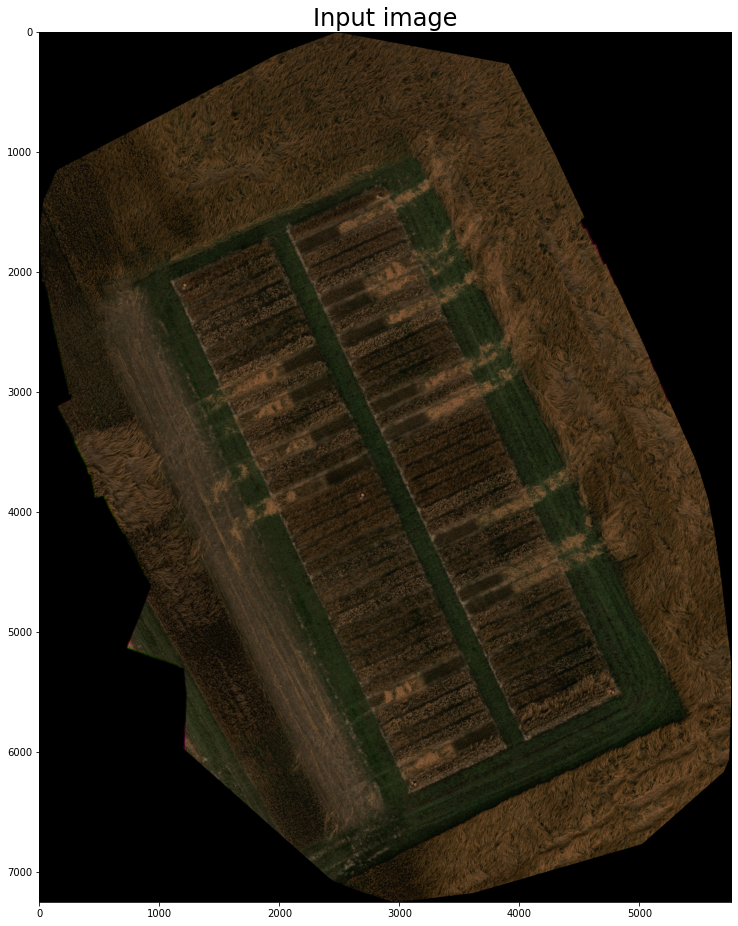

In [ ]:
# Read and show image ->
img = cv.imread(image)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(16,16))
plt.title("Input image", fontsize=24)
plt.imshow(img)
plt.show()

In [ ]:
# Shape of the input image ->
print(f"Input image shape: {img.shape}")

Input image shape: (7248, 5768, 3)


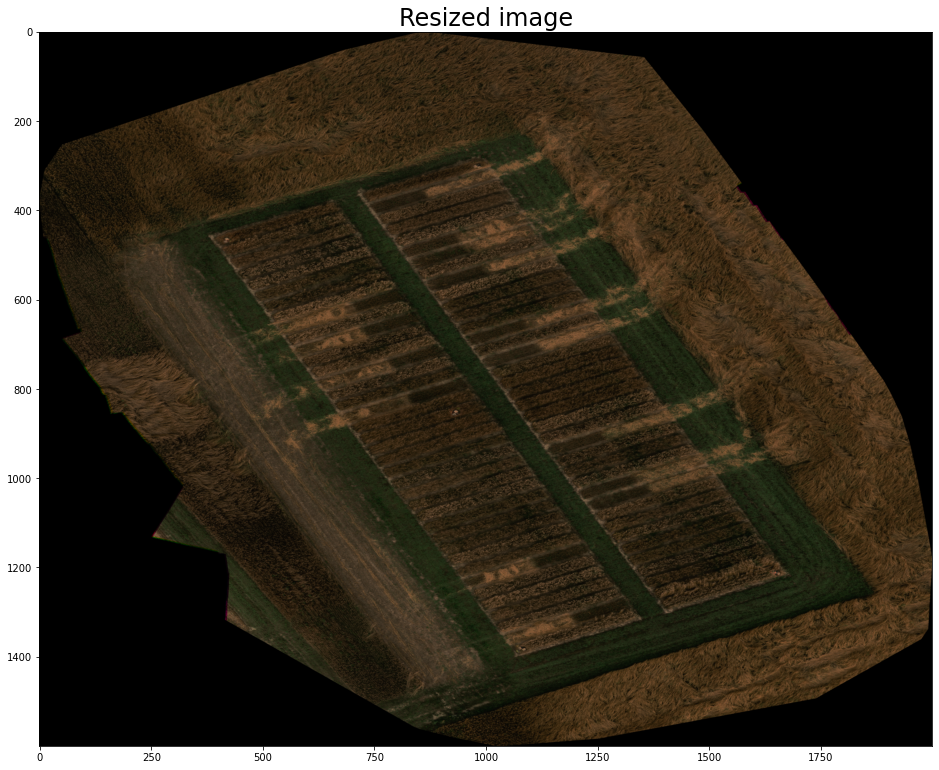

In [ ]:
# Let us rezise the image so that it would be faster ->
resized_img = cv.resize(img, (2000, 1600), interpolation = cv.INTER_AREA)

plt.figure(figsize=(16,16)) # just for scaling
plt.title("Resized image", fontsize=24)
plt.imshow(resized_img)
plt.show()

In [ ]:
# Shape of the resized image ->
print(f"Resized image shape: {resized_img.shape}")

Resized image shape: (1600, 2000, 3)


## **IV. Model training**

In [ ]:
# Reshape the resized image to 2D array and convert the values to float64 ->
resized_img_array = resized_img.reshape((-1,3))
resized_img_array = np.float64(resized_img_array)

In [ ]:
# Shape of the 2D array ->
print(f"2D array (resized image) shape: {resized_img_array.shape}")

2D array (resized image) shape: (3200000, 3)


In [ ]:
# Model training ->
number_of_colors = 5

model = KMeans(n_clusters = number_of_colors, verbose=1)
predictions = model.fit_predict(resized_img_array)
%time

Initialization complete
Iteration 0, inertia 335817911.0
Iteration 1, inertia 267270516.54541415
Iteration 2, inertia 263272412.40925974
Iteration 3, inertia 261663640.75874934
Iteration 4, inertia 260912107.9990679
Iteration 5, inertia 260491840.60279846
Iteration 6, inertia 260265578.29115134
Iteration 7, inertia 260121449.1290643
Iteration 8, inertia 260012587.27387598
Iteration 9, inertia 259916029.34571925
Iteration 10, inertia 259864232.32341182
Converged at iteration 10: center shift 0.04178665126849869 within tolerance 0.05240671811270485.
Initialization complete
Iteration 0, inertia 402505243.0
Iteration 1, inertia 296206886.98211133
Iteration 2, inertia 285013223.2900214
Iteration 3, inertia 278687338.3398968
Iteration 4, inertia 273977345.0540322
Iteration 5, inertia 270479934.97284824
Iteration 6, inertia 267769880.03261983
Iteration 7, inertia 265759997.26780707
Iteration 8, inertia 264270092.74020916
Iteration 9, inertia 263111577.18418682
Iteration 10, inertia 262243675.

## **V. Results**

In [ ]:
# Define necessary functions ->

def RGB_HEX(color):
  """
  Convert Kmeans RGB values to HEX values ->
  """
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def color_proportion_values(pct, counted_values):
  """
  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html
  
  Calculating the proportional values for colors present ->
  """
  absolute_values = int(pct/100.*sum(counted_values))
  return "{:.1f}% ({:d} )".format(pct, absolute_values)

def color_pie_chart_plot(predictions):
  """
  Generating the color_pie_chart_plot ->
  """
  # Aggregating values ->
  value_counts = Counter(predictions)
  cluster_centers = model.cluster_centers_
  # Transforming values ->
  ordered_colors = [cluster_centers[i] for i in value_counts.keys()]
  hex_colors = [RGB_HEX(ordered_colors[i]) for i in value_counts.keys()]
  categories = hex_colors
  # Start plotting ->
  fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
  wedges, texts, autotexts= ax.pie(value_counts.values(), autopct=lambda pct: color_proportion_values(pct, value_counts.values()), colors = hex_colors, pctdistance = 1.25)
  ax.legend(wedges, categories, title="RGB Color Class", loc="center left", bbox_to_anchor=(1, 0.25, 0.25, 0.75))
  # Plot values ->
  title = f"RGB colors of {number_of_colors} KMeans Clusters"
  ax.set_title(title, fontsize = 15)
  plt.show()

def clustered_image():
  global clustered_img
  """
  Generating the final clustered image based on the KMeans values ->
  """
  clustered_img = np.zeros((resized_img_array.shape),dtype='uint8')

  cluster_centers = model.cluster_centers_

  for ix in range(clustered_img.shape[0]):
    clustered_img[ix] = cluster_centers[predictions[ix]]
    
  clustered_img = clustered_img.reshape((resized_img.shape))
  plt.imshow(clustered_img)
  plt.title('Clustered image')
  plt.show()

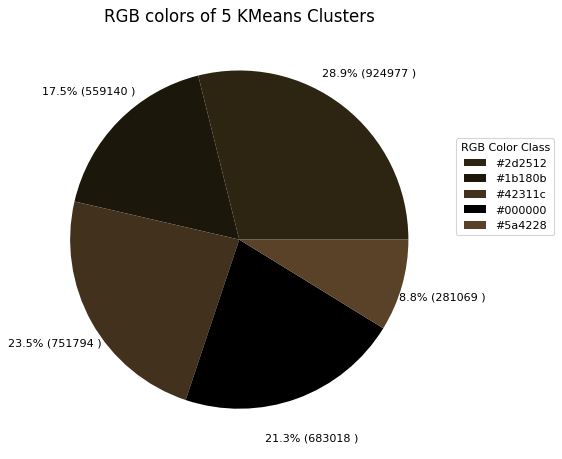

In [ ]:
# Draw the pie chart plot ->
color_pie_chart_plot(predictions)

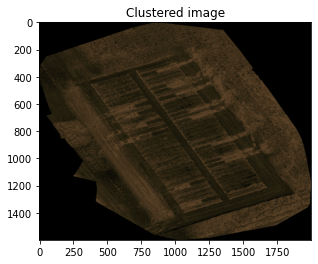

In [ ]:
# Draw the clustered image ->
clustered_image()

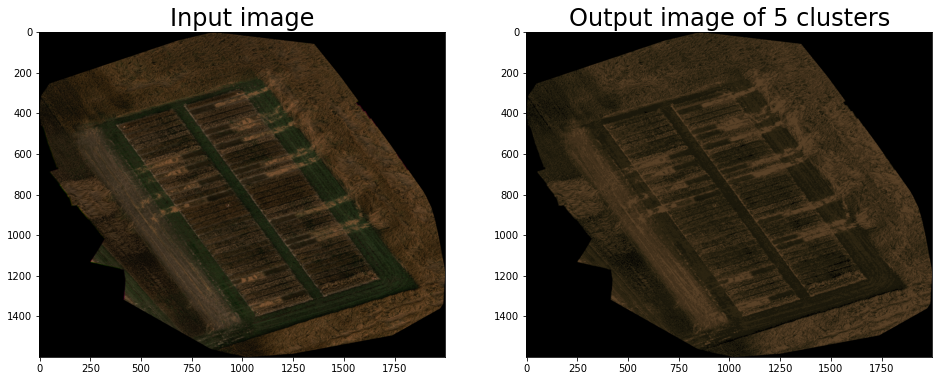

In [ ]:
# Comparison between input and clustered image ->
fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(resized_img)
plt.title('Input image', fontsize=24)

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(clustered_img)
plt.title(f'Output image of {number_of_colors} clusters', fontsize=24)
plt.show()